# Titanic Data Analysis
<h3>
    Josh Comstock
    10/25/2020
</h3>

In [1143]:
import pandas as pd
import numpy as np
from math import floor
from sklearn import svm

In [1144]:
training_df = pd.read_csv('train.csv')
testing_df = pd.read_csv('test.csv')

train_df = training_df[0:floor(len(training_df)*.75)].copy()  # Training on subsets of the data
test_df = training_df[floor(len(training_df)*.75):].copy()

In [1145]:
train_df.shape

(668, 12)

In [1146]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1147]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1148]:
train_df['Fare'] = train_df['Fare'].fillna(0)
test_df['Fare'] = test_df['Fare'].fillna(0)

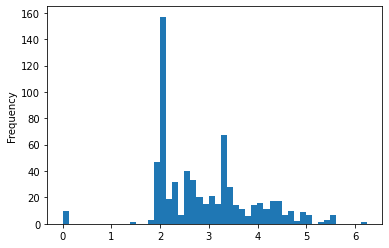

In [1149]:
import math
train_df['Fare_log'] = [math.log(x) if x > 0 else 0 for x in train_df['Fare']]
test_df['Fare_log'] = [math.log(x) if x > 0 else 0 for x in test_df['Fare']]


train_df['Fare_log'].plot(kind='hist', bins=50)

In [1150]:
train_df['Cabin_Bins'] = [str(x)[0].upper() for x in train_df['Cabin']]
test_df['Cabin_Bins'] = [str(x)[0].upper() for x in test_df['Cabin']]

In [1151]:
train_df['Age'] = train_df['Age'].fillna(28)
test_df['Age'] = test_df['Age'].fillna(28)

In [1152]:
import statistics as stats
stats.mean(train_df['Age'])

29.52058383233533

In [1153]:
train_df['Cabin_Bins'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [1154]:
def null_checker(df):
    lst = []
    df.apply(lambda x: lst.append(x.name) if x.isna().any() else None)
    return lst

In [1155]:
x_candidates = pd.get_dummies(train_df[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Cabin_Bins', 'Fare_log', 'Fare', 'Age']])
y_candidates = pd.get_dummies(test_df[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Cabin_Bins', 'Fare_log', 'Fare', 'Age']])

In [1156]:
x_candidates

,Pclass,SibSp,Parch,Fare_log,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Bins_A,Cabin_Bins_B,Cabin_Bins_C,Cabin_Bins_D,Cabin_Bins_E,Cabin_Bins_F,Cabin_Bins_G,Cabin_Bins_N,Cabin_Bins_T
0,3,1,0,1.981001,7.2500,22.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,0,4.266662,71.2833,38.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,0,0,2.070022,7.9250,26.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,1,0,3.972177,53.1000,35.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,0,0,2.085672,8.0500,35.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,3,0,0,2.014343,7.4958,36.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
664,3,1,0,2.070022,7.9250,20.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
665,2,2,0,4.297285,73.5000,32.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
666,2,0,0,2.564949,13.0000,25.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [1157]:
oh_features = list(set(x_candidates.columns).intersection(set(y_candidates.columns)))
train_mtx = x_candidates[oh_features]
test_mtx = y_candidates[oh_features]

In [1158]:
oh_features

['SibSp',
 'Pclass',
 'Cabin_Bins_B',
 'Cabin_Bins_D',
 'Sex_female',
 'Embarked_Q',
 'Sex_male',
 'Cabin_Bins_A',
 'Fare_log',
 'Fare',
 'Age',
 'Embarked_S',
 'Embarked_C',
 'Cabin_Bins_C',
 'Cabin_Bins_F',
 'Cabin_Bins_E',
 'Parch',
 'Cabin_Bins_N']

In [1159]:
null_checker(train_mtx)

[]

In [1160]:
train_mtx.head()

,SibSp,Pclass,Cabin_Bins_B,Cabin_Bins_D,Sex_female,Embarked_Q,Sex_male,Cabin_Bins_A,Fare_log,Fare,Age,Embarked_S,Embarked_C,Cabin_Bins_C,Cabin_Bins_F,Cabin_Bins_E,Parch,Cabin_Bins_N
0,1,3,0,0,0,0,1,0,1.981001,7.2500,22.0,1,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,4.266662,71.2833,38.0,0,1,1,0,0,0,0
2,0,3,0,0,1,0,0,0,2.070022,7.9250,26.0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,3.972177,53.1000,35.0,1,0,1,0,0,0,0
4,0,3,0,0,0,0,1,0,2.085672,8.0500,35.0,1,0,0,0,0,0,1


## Select best features with Chi2

In [1161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_mtx #independent columns
y = train_df[['Survived']]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [1162]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

           Specs        Score
9           Fare  2109.733811
4     Sex_female   126.305933
6       Sex_male    72.217274
8       Fare_log    19.650203
1         Pclass    19.204241
10           Age    15.619940
2   Cabin_Bins_B    15.330581
3   Cabin_Bins_D    13.140498
17  Cabin_Bins_N    12.331464
12    Embarked_C    12.089000
15  Cabin_Bins_E     7.922837
14  Cabin_Bins_F     7.097979
16         Parch     6.339683
13  Cabin_Bins_C     5.315519
11    Embarked_S     4.674707
7   Cabin_Bins_A     1.217960
0          SibSp     1.080554
5     Embarked_Q     0.731736


### Additional feature importance checks - Heatmap

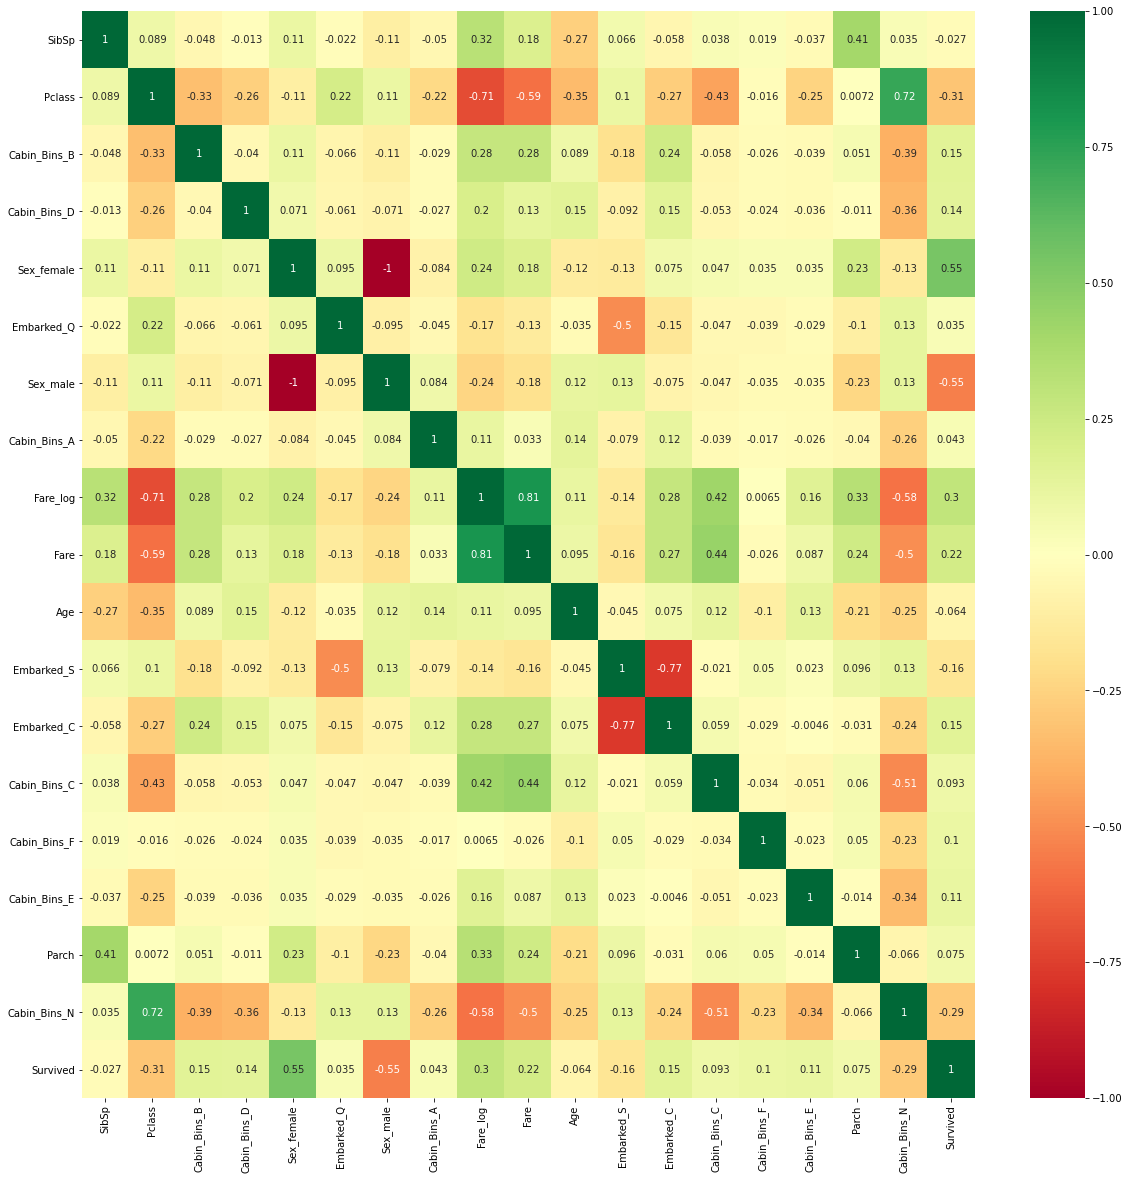

In [1163]:
import seaborn as sns
from matplotlib import pyplot as plt

x = train_mtx.copy()  #independent columns
x['Survived'] = train_df['Survived']


y = x['Survived']   #target column i.e price range
#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1164]:
refined_train = train_mtx[['Age', 'Fare', 'Cabin_Bins_N',  'Sex_female', 'Pclass', 'Embarked_C']]
refined_test = test_mtx[['Age', 'Fare', 'Cabin_Bins_N', 'Sex_female', 'Pclass', 'Embarked_C']]

In [1165]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))

In [1166]:
x = refined_train
y = train_df['Survived']
clf.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [1167]:
svm_predictions = clf.predict(refined_test)

In [1168]:
len(svm_predictions)

223

In [1169]:
svm_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0])

In [1170]:
test_df = test_df.reset_index()
test_df['svm_predictions'] = pd.Series(svm_predictions)

In [1171]:
train_df['Survived'].value_counts()

0    408
1    260
Name: Survived, dtype: int64

In [1172]:
test_df['Survived'].value_counts()

0    141
1     82
Name: Survived, dtype: int64

In [1173]:
test_df[['PassengerId', 'Survived', 'svm_predictions']]

,PassengerId,Survived,svm_predictions
0,669,0,0
1,670,1,1
2,671,1,1
3,672,0,0
4,673,0,0
...,...,...,...
218,887,0,0
219,888,1,1
220,889,0,1
221,890,1,1


In [1174]:
from sklearn.metrics import confusion_matrix
y_true = test_df['Survived']
y_pred = test_df['svm_predictions']

cf_matrix = confusion_matrix(y_true, y_pred)

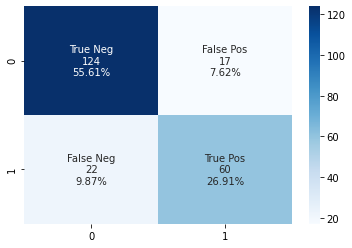

In [1175]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<div>
<p>
    False negative appears negative but shouldn't be <br/>
    0 means died <br/>
    1 means survived <br/>
    False positive means we think they survived but they died <br/>
    <b>
        False negative means we think they died but they survived
    </b>
</p>
</div>

In [1176]:
len(test_df[(test_df['Survived']==1) & (test_df['svm_predictions']==0)])
# We predicted 27 people would die that actually survived

22

### Analyzing our confusion matrix

In [1177]:
test_df[(test_df['Survived']==1) & (test_df['svm_predictions']==0)]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Cabin_Bins,svm_predictions
5,673,674,1,2,"Wilhelms, Mr. Charles",male,31.00,0,0,244270,13.0000,NaN,S,2.564949,N,0
22,690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,B20,S,4.043051,B,0
24,692,693,1,3,"Lam, Mr. Ali",male,28.00,0,0,1601,56.4958,NaN,S,4.034166,N,0
33,701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.00,0,0,PC 17475,26.2875,E24,S,3.269094,E,0
39,707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.00,0,0,PC 17476,26.2875,E24,S,3.269094,E,0
41,709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.00,1,1,2661,15.2458,NaN,C,2.724304,N,0
44,712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.00,1,0,19996,52.0000,C126,S,3.951244,C,0
56,724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.00,1,0,113806,53.1000,E8,S,3.972177,E,0
72,740,741,1,1,"Hawksford, Mr. Walter James",male,28.00,0,0,16988,30.0000,D45,S,3.401197,D,0
76,744,745,1,3,"Stranden, Mr. Juho",male,31.00,0,0,STON/O 2. 3101288,7.9250,NaN,S,2.070022,N,0


In [1178]:
# Based on the subset above, we can see that most of these false negatives are all males
# The model is biased too heavily towards thinking that men will die

# We will change the weights on the males and then run this again with a polynomial kernel

### Hyperparameter Tuning

In [1179]:
x = refined_train
y = train_df['Survived']

In [1180]:
# from sklearn.model_selection import GridSearchCV 

# # defining parameter range 
# param_grid = {'C': [0.05, 0.1, .25, .5, .75, 1, 5, 10, 100, 1000, 1500, 2500, 3000, 5000], 
#     'gamma': [2500, 1750, 1500, 1250, 1000, 100, 50, 25, 10, 5, 1, .5, 0.1, 0.01, 0.025, 0.001, 0.005, 0.0001], 
#     'kernel': ['rbf', 'sigmoid']} 

# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

# # fitting the model for grid search 
# grid.fit(x, y)

In [1181]:
# # print best parameter after tuning 
# print(grid.best_params_) 

# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_)

In [1182]:
# {'C': 3000, 'gamma': 0.0001, 'kernel': 'rbf'}
# SVC(C=3000, gamma=0.0001)

In [1183]:
# from sklearn.metrics import classification_report
# grid_predictions = grid.predict(refined_test) 

# # print classification report
# print(classification_report(test_df['Survived'], grid_predictions))

In [1184]:
# x['Sex_female'] = [x*.5 for x in refined_train['Sex_female']]

clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
# clf = make_pipeline(StandardScaler(), svm.SVC(gamma=.0001, C=5000, kernel='rbf'))
clf.fit(x, y)
svm_predictions = clf.predict(refined_test)

In [1185]:
test_df = test_df.reset_index()
test_df['svm_predictions'] = pd.Series(svm_predictions)

In [1186]:
y_true = test_df['Survived']
y_pred = test_df['svm_predictions']

cf_matrix = confusion_matrix(y_true, y_pred)

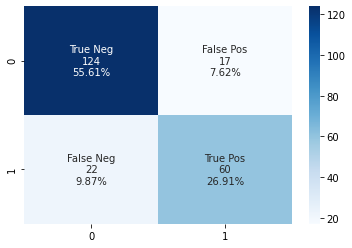

In [1187]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Run the model with actual train and test data

In [1188]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Fare'] = train_df['Fare'].fillna(0)
test_df['Fare'] = test_df['Fare'].fillna(0)

train_df['Fare_log'] = [math.log(x) if x > 0 else 0 for x in train_df['Fare']]
test_df['Fare_log'] = [math.log(x) if x > 0 else 0 for x in test_df['Fare']]

train_df['Age'] = train_df['Age'].fillna(28)
test_df['Age'] = test_df['Age'].fillna(28)

train_df['Cabin_Bins'] = [str(x)[0].upper() for x in train_df['Cabin']]
test_df['Cabin_Bins'] = [str(x)[0].upper() for x in test_df['Cabin']]

x_candidates = pd.get_dummies(train_df[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Cabin_Bins', 'Fare_log', 'Fare', 'Age']])
y_candidates = pd.get_dummies(test_df[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Cabin_Bins', 'Fare_log', 'Fare', 'Age']])

oh_features = list(set(x_candidates.columns).intersection(set(y_candidates.columns)))
train_mtx = x_candidates[oh_features]
test_mtx = y_candidates[oh_features]

refined_train = train_mtx[['Age', 'Fare', 'Cabin_Bins_N',  'Sex_female', 'Pclass', 'Embarked_C']]
refined_test = test_mtx[['Age', 'Fare', 'Cabin_Bins_N', 'Sex_female', 'Pclass', 'Embarked_C']]

x = refined_train
y = train_df['Survived']

clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
# clf = make_pipeline(StandardScaler(), svm.SVC(gamma=.0001, C=5000, kernel='rbf'))
# clf = make_pipeline(StandardScaler(), svm.SVC(gamma=1, C=1000, kernel='linear'))

clf.fit(x, y)
svm_predictions = clf.predict(refined_test)

test_df = test_df.reset_index()
test_df['svm_predictions'] = pd.Series(svm_predictions)

test_df.rename(columns={'svm_predictions':'Survived'}, inplace=True)
test_df[['PassengerId', 'Survived']].to_csv('svm_submissions.csv', index=False)